In [55]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import cmdstanpy
from cmdstanpy import CmdStanModel

# Excercise 1 - generate data

In [56]:
F = len('Maciej')
L = len('Gornik')
N = (L + F) * 100
F, L, N

(6, 6, 1200)

In [57]:
model_1 = CmdStanModel(stan_file='/home/lab6/code_1.stan')

In [58]:
R = 1
sim_1=model_1.sample(data={'N': N}, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

09:49:07 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


09:49:07 - cmdstanpy - INFO - CmdStan done processing.


In [59]:
df_1 = sim_1.draws_pd()
df_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.01,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,...,-0.17927,-0.715089,-1.7273,-0.404984,1.08221,-1.00288,-1.35285,0.922614,-1.20906,-0.049961


In [60]:
model_2 = CmdStanModel(stan_file='/home/lab6/code_2.stan')

In [61]:
R = 1
sim_2=model_2.sample(data={'N': N}, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

09:49:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


09:49:08 - cmdstanpy - INFO - CmdStan done processing.


In [62]:
df_2 = sim_2.draws_pd()
df_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,2.70817,0.777181,-1.27227,0.127591,-1.38942,0.246162,1.19873,2.26533,...,-1.73839,5.82632,0.467584,5.68971,1.48844,-1.80466,-2.98097,2.59505,-3.23928,1.37315


# Excercise 2 - compare normal and student models for data from first file

In [63]:
model_3=CmdStanModel(stan_file='code_3.stan')

In [64]:
dm_1 = df_1.iloc[0, 3:]
sim_3=model_3.sample(data={'N': N, 'y': dm_1})

09:49:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


09:49:10 - cmdstanpy - INFO - CmdStan done processing.
09:49:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_3.stan', line 13, column 3 to column 40)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_3.stan', line 13, column 3 to column 40)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_3.stan', line 13, column 3 to column 40)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_3.stan', line 13, column 3 to column 40)
Consider re-running with show_console=True if the above output is unclear!


In [65]:
df_3 = sim_3.draws_pd()
df_3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-2182.69,0.926001,0.781155,1.0,1.0,0.0,2183.08,1.43620,0.012857,-1.32730,...,0.806833,2.162890,1.020680,-2.604340,-3.618400,1.110280,0.526669,3.215220,0.077358,0.510208
1,-2180.50,0.970977,0.781155,3.0,7.0,0.0,2183.98,1.53422,0.118712,-1.40964,...,-0.141566,-0.318323,-0.541754,-0.763301,1.131260,-0.031313,0.578774,-2.244950,-2.109740,1.266810
2,-2179.49,0.974706,0.781155,3.0,7.0,0.0,2181.22,1.48874,0.064141,-1.37073,...,-1.536190,0.569717,1.217000,0.850725,0.299722,0.510875,-1.408390,0.705075,-0.033673,0.101903
3,-2181.24,0.671014,0.781155,2.0,3.0,0.0,2183.64,1.52154,0.023368,-1.38198,...,-0.549010,-0.575873,-0.055582,1.728400,-0.996328,1.696850,-2.055870,2.371710,-1.459010,1.172530
4,-2179.51,1.000000,0.781155,2.0,3.0,0.0,2181.18,1.50615,0.076652,-1.38385,...,0.699873,-1.304270,-0.656443,1.263340,1.609830,2.373350,-0.171663,0.522836,-0.934050,-0.435338


In [66]:
model_4=CmdStanModel(stan_file='code_4.stan')

In [67]:
dm_1 = df_1.iloc[0, 3:]
sim_4=model_4.sample(data={'N': N, 'y': dm_1})

09:49:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


09:49:18 - cmdstanpy - INFO - CmdStan done processing.
09:49:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Degrees of freedom parameter is 0, but must be positive finite! (in '/home/lab6/code_4.stan', line 15, column 3 to column 47)
	Exception: student_t_lpdf: Degrees of freedom parameter is 0, but must be positive finite! (in '/home/lab6/code_4.stan', line 15, column 3 to column 47)
	Exception: student_t_lpdf: Degrees of freedom parameter is inf, but must be positive finite! (in '/home/lab6/code_4.stan', line 15, column 3 to column 47)
Exception: student_t_lpdf: Degrees of freedom parameter is 0, but must be positive finite! (in '/home/lab6/code_4.stan', line 15, column 3 to column 47)
	Exception: student_t_lpdf: Degrees of freedom parameter is 0, but must be positive finite! (in '/home/lab6/code_4.stan', line 15, column 3 to column 47)
	Exception: student_t_lpdf: Degrees of freedom parameter is inf, but must be positive finite! (in '/home/lab

In [68]:
df_4 = sim_4.draws_pd()
df_4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-1803.45,0.911997,0.627349,3.0,7.0,0.0,1804.75,0.851879,0.035197,3.76214,...,0.998587,-0.085072,-0.420249,0.321382,1.238750,-0.786252,-0.733688,-0.350074,-0.191387,0.091328
1,-1803.90,0.986529,0.627349,2.0,7.0,0.0,1804.94,0.841956,0.046878,4.76046,...,0.731278,-0.085691,1.492520,0.109519,-2.024750,-1.603760,-0.377430,-0.516140,0.372725,-0.184223
2,-1803.51,1.000000,0.627349,2.0,3.0,0.0,1804.21,0.835139,0.038338,4.68278,...,1.452370,-0.389862,-0.326754,0.510638,0.228583,-0.256067,-0.122268,0.276428,0.139444,-0.372248
3,-1803.42,0.632238,0.627349,2.0,7.0,0.0,1807.48,0.878153,0.017781,4.05548,...,0.622353,0.367030,0.478541,1.313680,0.476706,1.388960,-0.593467,-0.052983,-2.361420,-0.418563
4,-1803.35,1.000000,0.627349,2.0,3.0,0.0,1803.93,0.841298,0.002861,4.91725,...,1.294100,-0.563615,-0.102815,-1.317140,0.270177,-0.156209,0.874964,-0.088554,-0.801432,-0.150747


In [69]:
data = {'model_3': sim_3, 'model_4': sim_4}
compare_loo = az.compare(data, ic='loo')
compare_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_4,0,-1803.560043,4.566000,0.000000,1.0,38.263982,0.000000,False,log
model_3,1,-2194.200587,28.950119,390.640543,0.0,133.263808,106.991086,True,log


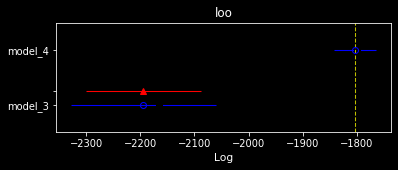

In [70]:
az.plot_compare(compare_loo, plot_kwargs= {'color_ic': 'b', 'color_dse' : 'r', 'color_ls_min_ic' : 'y'})
plt.title("loo")
plt.show()

In [71]:
data = {'model_3': sim_3, 'model_4': sim_4}
compare_waic = az.compare(data, ic='waic')
compare_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_4,0,-1803.545784,4.551741,0.000000,1.0,38.259905,0.000000,True,log
model_3,1,-2195.008253,29.757786,391.462469,0.0,133.670665,107.417429,True,log


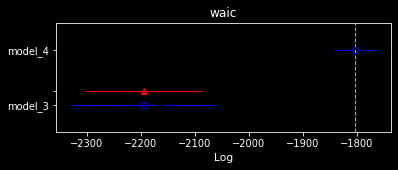

In [72]:
az.plot_compare(compare_waic, plot_kwargs= {'color_ic': 'b', 'color_dse' : 'r', 'color_ls_min_ic' : 'y'})
plt.title("waic")
plt.show()

# Excercise 3 - compare models with different numbers of predictors

In [73]:
model_5=CmdStanModel(stan_file='code_5.stan')

In [74]:
df_5_1 = {'N': N, 'K': 1, 'y': df_2.loc[:, 'y[1]':].values.reshape((N)), 'X': df_2.loc[:, 'X[1,1]': f'X[{N},1]'].values.reshape((N, 1))}
sim_5_1=model_5.sample(data=df_5_1)

09:49:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)





chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


09:49:30 - cmdstanpy - INFO - CmdStan done processing.
09:49:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
Consider re-running with show_console=True if the above output is unclear!


In [75]:
df_5_2 = {'N': N, 'K': 2, 'y': df_2.loc[:, 'y[1]':].values.reshape((N)), 'X': df_2.loc[:, 'X[1,1]': f'X[{N},2]'].values.reshape((N, 2))}
sim_5_2=model_5.sample(data=df_5_2)

09:49:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


09:49:34 - cmdstanpy - INFO - CmdStan done processing.
09:49:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
Consider re-running with show_console=True if the above output is unclear!


In [76]:
df_5_3 = {'N': N, 'K': 3, 'y': df_2.loc[:, 'y[1]':].values.reshape((N)), 'X': df_2.loc[:, 'X[1,1]': f'X[{N},3]'].values.reshape((N, 3))}
sim_5_3=model_5.sample(data=df_5_3)

09:49:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


09:49:38 - cmdstanpy - INFO - CmdStan done processing.
09:49:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/lab6/code_5.stan', line 19, column 4 to column 26)
Consider re-running with show_console=True if the above output is unclear!


In [77]:
data = {'model_5_1': sim_5_1, 'model_5_2': sim_5_2, 'model_5_3': sim_5_3}
compare_loo = az.compare(data, ic='loo')
compare_loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_5_1,0,-2181.321615,2.015290,0.000000,1.0,23.957294,0.000000,False,log
model_5_3,1,-2823.031868,4.054273,641.710253,0.0,23.585914,27.721887,False,log
model_5_2,2,-2823.159235,2.989611,641.837620,0.0,23.534979,27.596327,False,log


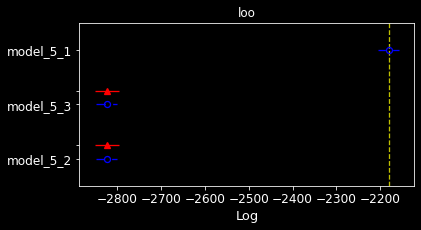

In [78]:
az.plot_compare(compare_loo, plot_kwargs= {'color_ic': 'b', 'color_dse' : 'r', 'color_ls_min_ic' : 'y'})
plt.title("loo")
plt.show()

In [79]:
data = {'model_5_1': sim_5_1, 'model_5_2': sim_5_2, 'model_5_3': sim_5_3}
compare_waic = az.compare(data, ic='waic')
compare_waic

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_5_1,0,-2181.321761,2.015436,0.000000,1.000000e+00,23.957312,0.000000,False,log
model_5_3,1,-2823.031718,4.054123,641.709958,1.300394e-10,23.585901,27.721888,False,log
model_5_2,2,-2823.159056,2.989433,641.837296,0.000000e+00,23.534963,27.596327,False,log


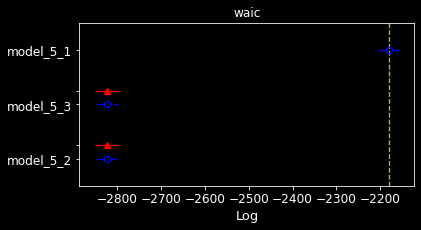

In [80]:
az.plot_compare(compare_waic, plot_kwargs= {'color_ic': 'b', 'color_dse' : 'r', 'color_ls_min_ic' : 'y'})
plt.title("waic")
plt.show()